In [68]:
import warnings 
warnings.filterwarnings("ignore")

In [69]:
import pandas as pd
import re

answers = """
Я активно ищу возможности для участия: 3
Мне интересно, но я ещё не участвовал: 2
Я не знаю, что такое научные конференции.: 1
Мне это не интересно: 0

Технологии и инновации: 4
Гуманитарные науки: 2
Естественные науки: 2
Социальные науки: 2
Любая тема интересует: 3

Возможность представить свою работу: 4
Обмен опытом и знаниями: 3
Повышение своей квалификации: 3
Получение сертификата или диплома: 2
Просто интерес: 2

Очень важно: 4
Важно: 3
Нейтрально: 2
Не очень важно: 1
Совсем не важно: 0

Недостаток времени: 4
Финансовые затраты: 3
Недостаток опыта или знаний: 3
Нет интереса к теме конференции: 2
Другие причины: 1

Да, это было бы замечательно: 4
Возможно, но это зависит от многих факторов: 3
Нет, я бы предпочел участвовать в конференциях в своей стране: 2

Я бы хотел выступить с докладом: 4
Я бы предпочел просто слушать: 3
Я еще не знаю: 2

Только в моей специализации: 3
В других областях тоже интересно: 2
Мне всё равно: 1

Да, это может быть полезно: 4
Возможно, но я не уверен: 3
Нет, я не вижу связи: 2

Был(а) практически на каждом, что были: 4
На многих, но по одному определенному направлению: 3
В нескольких за все время обучения: 2
Никогда: 1
Другой ответ: 0

Хобби: 4
Помогаю по дому: 3
Саморазвитие: 3
Cпорт: 2
Pаботаю: 2
Нет свободного времени: 1
Ничем: 1

Подписан на курсы: 4
Читаю научную литературу: 3
Хожу на доп. занятия: 3
Занимаюсь программированием: 2
Не занимаюсь: 1

Настояли родители: 1
От безысходности: 2
Актуальная профессия: 3
Собственный интерес: 4
Свой вариант: 3

Боюсь выступать: 1
При необходимости могу выступить: 2
Обожаю выступать: 4
Мне дается это легко, но ...: 3
Свой вариант: 3

Абсолютно позитивно, готов работать в команде: 4
Нейтрально, зависит от ситуации: 3
Не очень хотел бы сильно взаимодействовать с другими: 2
Предпочел бы работать в одиночку: 1
"""

lines = answers.strip().split('\n')
data = [re.split(r':\s*', line, maxsplit=1) for line in lines]

df = pd.DataFrame(data, columns=['Ответ', 'Вес'])

df.to_csv('answers_weights.csv', index=False)


In [70]:
import pandas as pd

main_dataset = pd.read_csv('2023-11-07_Opros_pervokursnikov_3.csv', decimal=',')

answers_weights_dataset = pd.read_csv('answers_weights.csv')

answers_weights_dict = dict(zip(answers_weights_dataset['Ответ'], answers_weights_dataset['Вес']))

for column in main_dataset.columns[3:]:
    main_dataset[column] = main_dataset[column].apply(lambda x: answers_weights_dict.get(x, x) if pd.notnull(x) else x)


main_dataset.to_csv('updated_dataset.csv', index=False)


In [71]:
unique_values_dataset = set(main_dataset['Чем вы занимаетесь в свободное время?'].dropna().unique())
unique_values_answers = set(answers_weights_dict.keys())

print("Уникальные значения в основном датасете, которых нет в словаре:", unique_values_dataset - unique_values_answers)
print("Уникальные значения в словаре, которых нет в основном датасете:", unique_values_answers - unique_values_dataset)


Уникальные значения в основном датасете, которых нет в словаре: {1.0, 2.0, 3.0, 4.0}
Уникальные значения в словаре, которых нет в основном датасете: {'Возможно, но это зависит от многих факторов', 'Да, это может быть полезно', 'Возможность представить свою работу', 'Важно', 'На многих, но по одному определенному направлению', 'Да, это было бы замечательно', 'Настояли родители', 'Подписан на курсы', 'Нет интереса к теме конференции', 'Не очень хотел бы сильно взаимодействовать с другими', 'Помогаю по дому', 'Я бы хотел выступить с докладом', 'Нейтрально', 'Читаю научную литературу', 'Занимаюсь программированием', 'Ничем', 'Другой ответ', 'Мне это не интересно', 'Технологии и инновации', 'Обмен опытом и знаниями', 'Мне всё равно', 'Был(а) практически на каждом, что были', 'Просто интерес', 'Другие причины', 'В других областях тоже интересно', 'Естественные науки', 'Не занимаюсь', 'Я еще не знаю', 'Хобби', 'Cпорт', 'От безысходности', 'Я не знаю, что такое научные конференции.', 'Очень ва

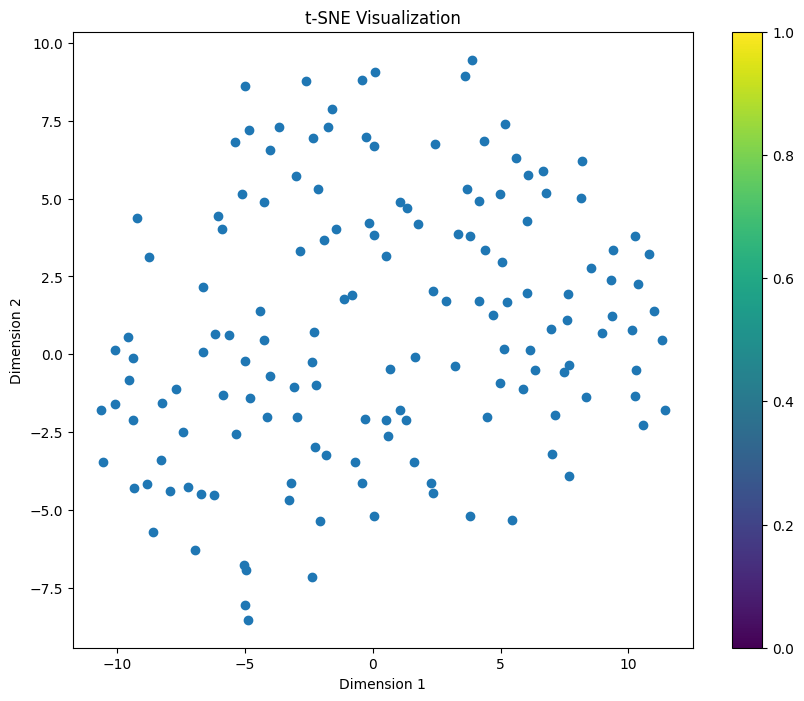

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

df = pd.read_csv('updated_dataset.csv')  

features = df.iloc[:, 3:].values

tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(features)

df_tsne = pd.DataFrame(tsne_representation, columns=['Dimension 1', 'Dimension 2'])

plt.figure(figsize=(10, 8))
plt.scatter(df_tsne['Dimension 1'], df_tsne['Dimension 2'], cmap='viridis')
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()
plt.show()


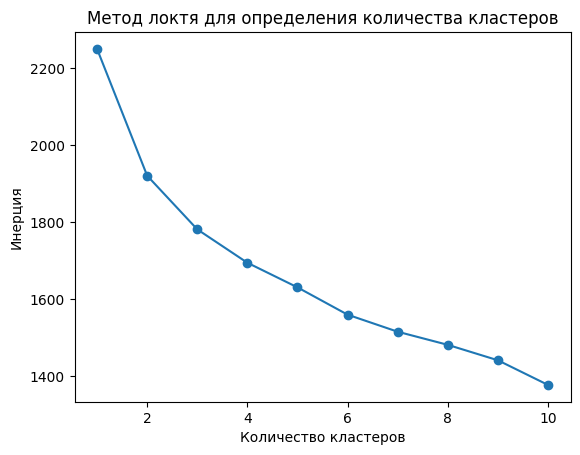

In [73]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('updated_dataset.csv')

features = df.iloc[:, 3:]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения количества кластеров')
plt.show()

optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

df.to_csv('result_with_clusters.csv', index=False)


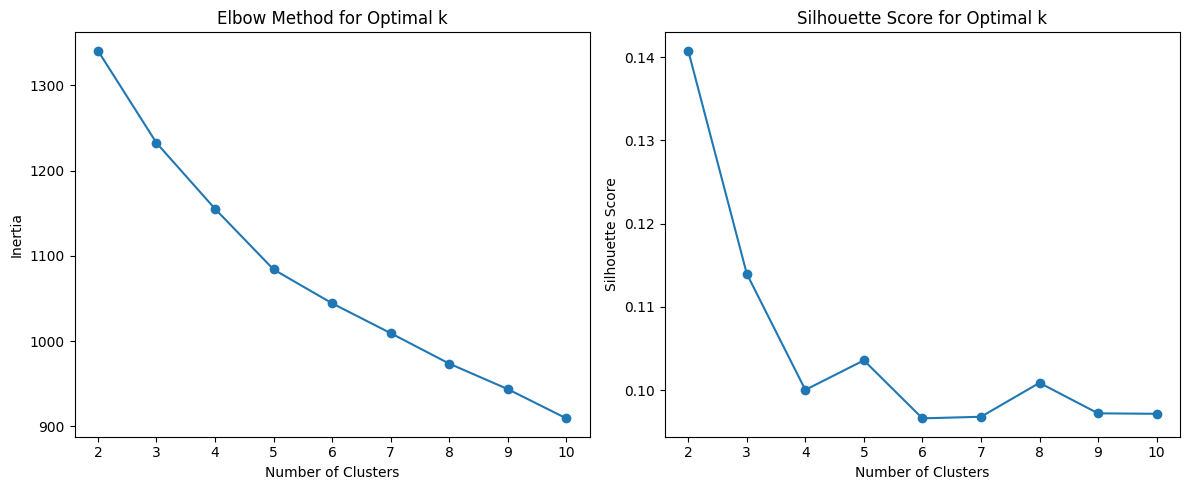

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


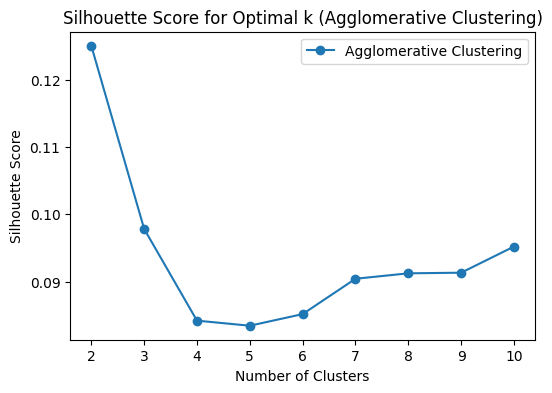

In [75]:
from sklearn.cluster import AgglomerativeClustering

silhouette_scores_agg = []
for n_clusters in range(2, 11):
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_cluster.fit_predict(features)
    silhouette_scores_agg.append(silhouette_score(features, labels))

plt.figure(figsize=(6, 4))

plt.plot(range(2, 11), silhouette_scores_agg, marker='o', label='Agglomerative Clustering')
plt.title('Silhouette Score for Optimal k (Agglomerative Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()


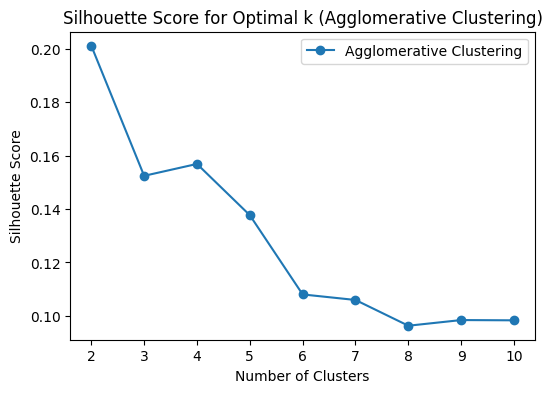

In [76]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv('2023-11-07_Opros_pervokursnikov_3.csv')  

features = df.iloc[:, 3:]

encoder = OrdinalEncoder()
df_ordinal_encoded = pd.DataFrame(encoder.fit_transform(features), columns=features.columns)

silhouette_scores_agg = []
for n_clusters in range(2, 11):
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_cluster.fit_predict(df_ordinal_encoded)
    silhouette_scores_agg.append(silhouette_score(df_ordinal_encoded, labels))


plt.figure(figsize=(6, 4))

plt.plot(range(2, 11), silhouette_scores_agg, marker='o', label='Agglomerative Clustering')
plt.title('Silhouette Score for Optimal k (Agglomerative Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()


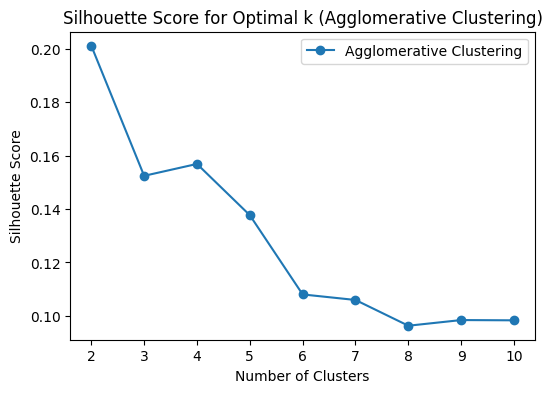

In [77]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('2023-11-07_Opros_pervokursnikov_3.csv')  

features = df.iloc[:, 3:]

df_label_encoded = features.apply(LabelEncoder().fit_transform)

silhouette_scores_agg = []
for n_clusters in range(2, 11):
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_cluster.fit_predict(df_label_encoded)
    silhouette_scores_agg.append(silhouette_score(df_label_encoded, labels))

plt.figure(figsize=(6, 4))

plt.plot(range(2, 11), silhouette_scores_agg, marker='o', label='Agglomerative Clustering')
plt.title('Silhouette Score for Optimal k (Agglomerative Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()


In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('result_with_clusters_agg_4.csv')  

features = df.iloc[:, 3:]

df_label_encoded = features.apply(LabelEncoder().fit_transform)

X_train, X_test, y_train, y_test = train_test_split(df_label_encoded, df['Cluster'], test_size=0.2, random_state=42)

decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

y_pred = decision_tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_str)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [86]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('2023-11-07_Opros_pervokursnikov_3.csv')  

features = df.iloc[:, 3:]

df_label_encoded = features.apply(LabelEncoder().fit_transform)

n_clusters = 4 
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)

labels = agg_cluster.fit_predict(df_label_encoded)

df['Cluster'] = labels

df.to_csv(f'result_with_clusters_agg_{n_clusters}.csv', index=False)


In [88]:
main_question = df[['Какое из утверждений наиболее близко описывает ваше отношение к участию в научных конференциях?', 'Cluster']]
main_question.to_csv('main_question.csv', index=False)

In [90]:
cluster_counts = main_question['Cluster'].value_counts()
print(cluster_counts)


Cluster
1    50
0    43
2    34
3    23
Name: count, dtype: int64


In [99]:
unique_answers = main_question['Какое из утверждений наиболее близко описывает ваше отношение к участию в научных конференциях?'].unique()
print(unique_answers)


['Мне это не интересно' 'Мне интересно, но я ещё не участвовал'
 'Я активно ищу возможности для участия'
 'Я не знаю, что такое научные конференции.']


In [106]:
cluster_distribution = main_question.groupby(['Какое из утверждений наиболее близко описывает ваше отношение к участию в научных конференциях?', 'Cluster']).size().reset_index(name='Counts')

total_responses = cluster_distribution['Counts'].sum()
cluster_distribution['Percentage'] = (cluster_distribution['Counts'] / total_responses) * 100

cluster_distribution.to_csv('cluster_distribution.csv', index=False)


In [102]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv('2023-11-07_Opros_pervokursnikov_3.csv')  

features = df.iloc[:, 3:]

encoder = OrdinalEncoder()
df_ordinal_encoded = pd.DataFrame(encoder.fit_transform(features), columns=features.columns)

n_clusters = 4 
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)

labels = agg_cluster.fit_predict(df_ordinal_encoded)

df['Cluster'] = labels

df.to_csv(f'result_with_clusters_agg_ordinal_{n_clusters}.csv', index=False)


In [103]:
main_question_ordinal = df[['Какое из утверждений наиболее близко описывает ваше отношение к участию в научных конференциях?', 'Cluster']]
main_question_ordinal.to_csv('main_question_ordinal.csv', index=False)

In [107]:
cluster_distribution_ordinal = main_question_ordinal.groupby(['Какое из утверждений наиболее близко описывает ваше отношение к участию в научных конференциях?', 'Cluster']).size().reset_index(name='Counts')

total_responses = cluster_distribution_ordinal['Counts'].sum()
cluster_distribution_ordinal['Percentage'] = (cluster_distribution_ordinal['Counts'] / total_responses) * 100

cluster_distribution_ordinal.to_csv('cluster_distribution_ordinal.csv', index=False)


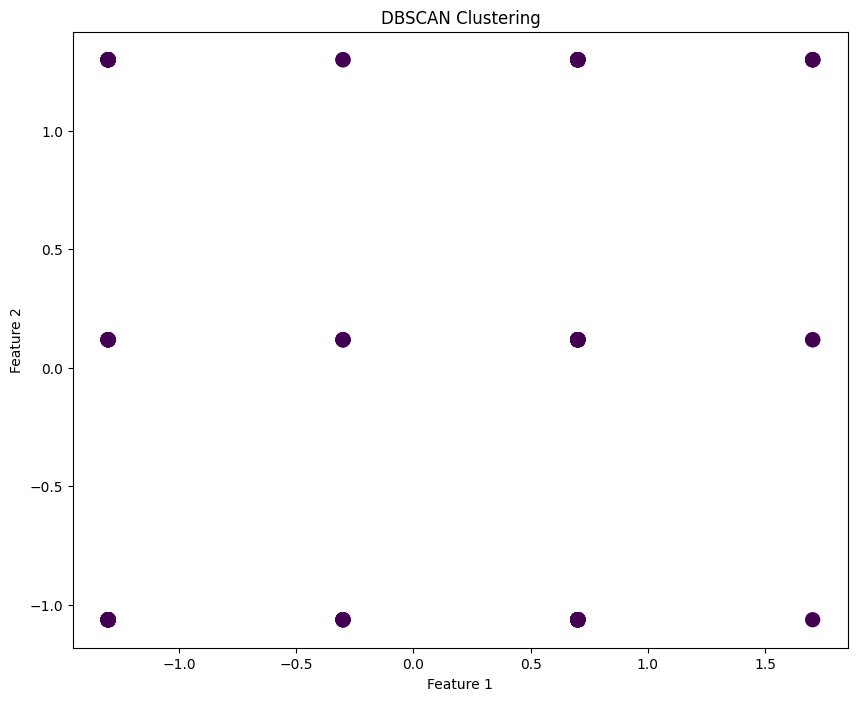

In [82]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('updated_dataset.csv')  

features = df.iloc[:, 3:].values

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(features_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=labels_dbscan, cmap='viridis', s=100)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


df['Cluster_DBSCAN'] = labels_dbscan

df.to_csv('result_with_dbscan_clusters.csv', index=False)
